In [51]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import math

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import matplotlib.pyplot as plt

In [52]:
data = pd.read_csv('mushrooms.csv')

In [53]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [54]:
# Assigning int value to char
for i in data.columns:
  for j in range(len(data)):
    data[i][j] = ord(data[i][j])

In [55]:
# Normalizing the data (Min-Max Normalization)
data_max = np.amax(data, axis=0)
data_min = np.amin(data, axis=0)

# veil-type has only one value
# Preventing hinderance to min-max normalization
data_min['veil-type'] = 0

norm_data = (data - data_min) / (data_max - data_min)
norm_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,1,0.684211,0.521739,1,0.625,1,0,1,0.391304,0,0.745098,0.684211,0.684211,0.913043,0.913043,1,0.818182,0.166667,1,0.391304,0.75,0.894737
1,0,1,0.684211,1,1,0,1,0,0,0.391304,0,0.705882,0.684211,0.684211,0.913043,0.913043,1,0.818182,0.166667,1,0.521739,0.541667,0.157895
2,0,0,0.684211,0.913043,1,0.458333,1,0,0,0.521739,0,0.705882,0.684211,0.684211,0.913043,0.913043,1,0.818182,0.166667,1,0.521739,0.541667,0.473684
3,1,1,1,0.913043,1,0.625,1,0,1,0.521739,0,0.745098,0.684211,0.684211,0.913043,0.913043,1,0.818182,0.166667,1,0.391304,0.75,0.894737
4,0,1,0.684211,0.217391,0,0.541667,1,1,0,0.391304,1,0.745098,0.684211,0.684211,0.913043,0.913043,1,0.818182,0.166667,0,0.521739,0,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0.409091,0.684211,0.521739,0,0.541667,0,0,0,1,0,0,0.684211,0.684211,0.565217,0.565217,1,0.0909091,0.166667,1,0,0.0833333,0.421053
8120,0,1,0.684211,0.521739,0,0.541667,0,0,0,1,0,0,0.684211,0.684211,0.565217,0.565217,1,0,0.166667,1,0,0.875,0.421053
8121,0,0.181818,0.684211,0.521739,0,0.541667,0,0,0,0.521739,0,0,0.684211,0.684211,0.565217,0.565217,1,0.0909091,0.166667,1,0,0.0833333,0.421053
8122,1,0.409091,1,0.521739,0,1,1,0,1,0,1,0,0.684211,0.263158,0.913043,0.913043,1,0.818182,0.166667,0,0.913043,0.875,0.421053


In [56]:
# Shuffling the dataset
train = norm_data.sample(frac=0.8).reset_index(drop=True)
dev = norm_data.sample(frac=0.1).reset_index(drop=True)
test = norm_data.sample(frac=0.1).reset_index(drop=True)

In [57]:
# For splitting target vector from feature frame
def split_target(df):
  train_df = pd.DataFrame()
  target_df = pd.DataFrame()
  for i in df.columns:
    if i == 'class':
      target_df = df[i]
    else:
      train_df = train_df.append(df[i])
  train_df = pd.DataFrame.transpose(train_df)
  return train_df, target_df

In [58]:
# Splitting for all train, test and dev sets
x_train, y_train = split_target(train)
x_dev, y_dev = split_target(dev)
x_test, y_test = split_target(test)

In [59]:
# Converting numpy arrays to tensors
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train.astype(float))

x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test.astype(float))

x_dev = tf.convert_to_tensor(x_dev)
y_dev = tf.convert_to_tensor(y_dev.astype(float))

In [60]:
# Basic Model
Basic_model = keras.Sequential(
    [
     layers.Dense(512, activation='relu'),
     layers.Dense(256, activation='relu'),
     layers.Dense(1, activation='sigmoid'),
    ]
)

Basic_model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy'],
)

In [70]:
hist = Basic_model.fit(x_train, y_train, batch_size=32, epochs=3, verbose=2, validation_data=(x_dev, y_dev))

Epoch 1/3
204/204 - 1s - loss: 0.0043 - accuracy: 0.9986 - val_loss: 8.8321e-05 - val_accuracy: 1.0000
Epoch 2/3
204/204 - 1s - loss: 0.0050 - accuracy: 0.9988 - val_loss: 2.5527e-04 - val_accuracy: 1.0000
Epoch 3/3
204/204 - 1s - loss: 0.0046 - accuracy: 0.9991 - val_loss: 2.1386e-04 - val_accuracy: 1.0000


In [71]:
Basic_model.evaluate(x_test, y_test, batch_size=32, verbose=2)

26/26 - 0s - loss: 4.1247e-05 - accuracy: 1.0000


[4.1247050830861554e-05, 1.0]

In [72]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

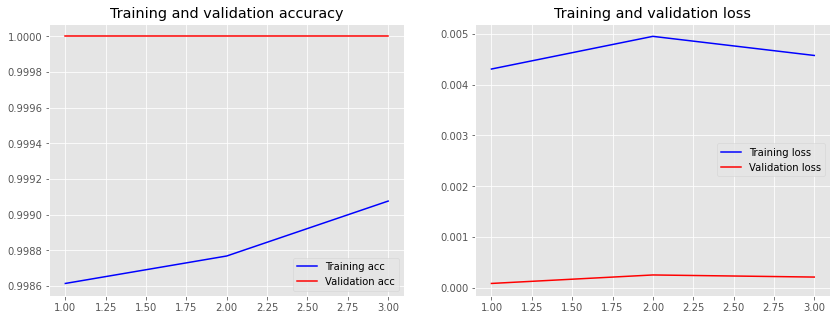

In [73]:
plot_history(hist)